# AIntroducción al Machine Learning

##Simulador XOR

In [6]:
#print("Ingrese valores binarios")
#n=int(input("Ingrese el Valor de entrada #1: "))
#m=int(input("Ingrese el Valor de entrada #2: "))
def XOR(m,n):
    if (m+n)%2==0:
         return 0
    else:
        return 1

#print(f"Su resultado es {XOR(m,n)}" )

for i in {0,1}:
    for j in {0,1}:
        print(f"{i} XOR {j}= {XOR(i,j)} ")


0 XOR 0= 0 
0 XOR 1= 1 
1 XOR 0= 1 
1 XOR 1= 0 


Simulador XOR usando el algoritmo del perceptron

In [7]:

import numpy as np

test1 = np.array([0, 1])
test2 = np.array([1, 1])
test3 = np.array([0, 0])
test4 = np.array([1, 0])
  

def unitStep(v):
    if v >= 0:
        return 1
    else:
        return 0
  

def perceptronModel(x, w, b):
    v = np.dot(w, x) + b
    y = unitStep(v)
    return y
  
#Existen infinitos valores que separan a los puntos 0 y 1 siempre que w sea diferente de 0
def NOT(x):
    wNOT = -45645331
    bNOT = 0
    return perceptronModel(x, wNOT, bNOT)

print(f"NOT({0})={NOT(0)}")
print(f"NOT({1})={NOT(1)}")

  
#Se usara como recta separadora la recta y=-x+2 (RECTA QUE PASA POR (1,1)) EQUIVALENTE A X2+X1-2=0
#SI se mantiene la pendiente de la recta b puede tomar cualquier valor en el intervalo (1,2]
def AND(x):
    w = np.array([1, 1])
    bAND = -2
    return perceptronModel(x, w, bAND)

for i in {0,1}:
    for j in {0,1}:
        print(f"{i} AND {j}= {AND([i,j])} ")
  
# Para la Disyunción puede ser la recta y=-x+0.5
def OR(x):
    w = np.array([1, 1])
    bOR = -0.5
    return perceptronModel(x, w, bOR)
  
for i in {0,1}:
    for j in {0,1}:
        print(f"{i} OR {j}= {OR([i,j])} ")

def XOR2(x):
    X1 = AND(x)
    X2 = OR(x)
    X3 = NOT(X1)
    final_x = np.array([X2, X3])
    finalOutput = AND(final_x)
    return finalOutput
  

for i in {0,1}:
    for j in {0,1}:
        print(f"{i} XOR {j}= {XOR2([i,j])} ")
  


NOT(0)=1
NOT(1)=0
0 AND 0= 0 
0 AND 1= 0 
1 AND 0= 0 
1 AND 1= 1 
0 OR 0= 0 
0 OR 1= 1 
1 OR 0= 1 
1 OR 1= 1 
0 XOR 0= 0 
0 XOR 1= 1 
1 XOR 0= 1 
1 XOR 1= 0 


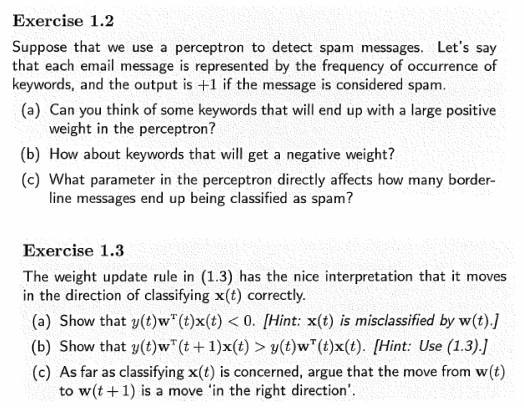

##Exercise 1.2 y 1.3



1.   Como $y(t)$ está mal clasificado  se tiene que $y(t)\neq sign(\omega^{T}(t)x(t))$; de esta manera $-y(t)=sign(\omega^{T}(t)x(t))$. 

$$y(t)\omega^{T}(t)x(t)=-y^2(t)<0$$


2.   $$y(t)\omega^{T}(t+1)x(t)>y(t)\omega^{T}(t)x(t)$$
 $$y(t)\omega^{T}(t+1)x(t)-y(t)\omega^{T}(t)x(t)>0$$
$$y(t)(\omega(t)+y(t)x(t))^{T}x(t)-y(t)\omega^{T}(t)x(t)>0$$
$$y(t)\omega^{T}(t)x(t)+y(t)(y(t)x(t))^{T}x(t)-y(t)\omega^{T}(t)x(t)>0$$
$$y(t)y(t)(x(t))^{T}x(t)>0$$
$$\vert(x(t))|>0$$

Esto último se debe a que los posibles valores de $y$ son 1 o -1 y como el vector $x(t)$ es un vector cuya primer coordenada es 1 la desigualdad siempre se cumple.

Ahora bien, para responder a la pregunta de la parte c) se debe resaltar que la modificación hecha a los pesos no necesariamente clasifican de manera correcta al vector $x$ en la siguiente iteración pero lo que la parte b) muestra es que esa sucesión de "malas" clasificaciones
 ($y\cdot\omega^{T}(t)\cdot x $) es estrictamente creciente, esto es que cada vez el algoritmo mejora su clasificación del punto $x$. Por último, al conveger este algoritmo - ¡en un número finito de iteraciones! Detalle que se analizará más adelante- la clasificación de este punto $y \cdot \omega^{*}\cdot x$ será positiva y por tanto esa sucesión creciente eventualmente será positiva.

 En términos de sucesiones existe un $N$ tal que si $t>N$ -No todos sino hasta a algúna cota desde la cual no habrán más actualizaciones- entonces: $$ \dfrac{|y \cdot \omega^{*}\cdot x|}{2}>|y \cdot \omega^{*}\cdot x-y \cdot \omega^{t}\cdot x|$$

Por ende para estos valores de $t$ el algoritmo logra clasificar correctamente el punto $x$.

## Significado de $\left(\dfrac{||\theta^{*}||}{\gamma}\right)^{2}$

Hay que aclarar que la sucesión de pesos $\omega$ no cumple las mismas propiedades que la sucesión de clasificadores $y\cdot \omega\cdot x$. La sucesión de pesos puede tener en si elementos repetidos y es finita,si se considerara infinita a partir de un valor esta seria constante.


Como vimos en la demostración de la convergencia del perceptron vimos que

$$F(k):=\cos(\omega^{*},\omega^{k})=\dfrac{ \sqrt{k}\cdot\gamma}{R||\theta||}$$

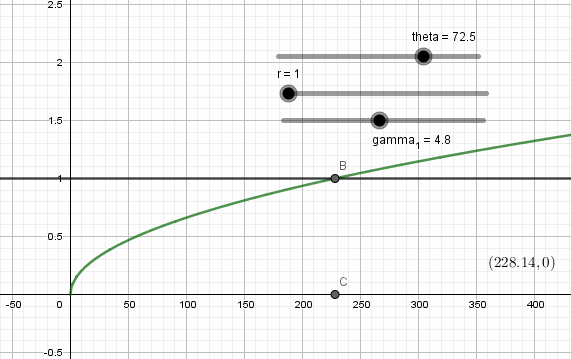




Como el ángulo entre 2 vectores se encuentra en el intervalo $\left(0,\dfrac{\pi}{2}\right)$ y la función $F(k)$ representa el coseno el ángulo formado entre el vector "ideal" y la k-ésima iteración del algoritmo; Buscamos entonces la iteración donde el valor del ángulo entre estos dos vectores sea el más cercano a $0$. Esto es estamos buscando el valor donde 
$$F(k^{*})=1$$
$$\dfrac{ \sqrt{k^{*}}\cdot\gamma}{R||\theta||}=1$$ 
$$\sqrt{k^{*}}=\dfrac{R||\theta||}{ \gamma}$$ 
$$k^{*}=\left(\dfrac{R||\theta||}{ \gamma}\right)^{2}$$ 

Como este valor posiblemente no es entero, se escoge el valor redondeado. Por ende, el significado del valor es que es quien calcula el número de iteraciones necesarias para terminar el algoritmo-teniendo en cuenta el tamaño del conjunto de datos-.


##Exercise 1.10



In [5]:

def espaciomuestral():
    Coin=[0,1]
    Muestra=np.matrix(np.empty((0,10)))
    Caras=np.array([])
    for i  in range(1000):
        Muestra=np.insert(Muestra, i , np.random.choice(Coin,10),axis=0)
        Caras=np.append(Caras,np.sum(Muestra[i]))


    c1=Muestra[1]
    n=int(np.random.choice(1000,1))
    crand=Muestra[n]
    where=np.where(Caras==np.min(Caras))                
    cmin=Muestra[where[0]]
    v1=np.mean(c1)
    vrand=np.mean(crand)
    vmin=np.mean(cmin)
    #mu=np.mean([v1,vrand,vmin])
    return v1,vrand,vmin

def experimento(n):
    V1=[]
    Vrand=[]
    Vmin=[]
    #Mus=[]
    for i in range(n):
        v1,vrand,vmin=espaciomuestral()
        V1.append(v1)
        Vrand.append(vrand)
        Vmin.append(vmin)
        #Mus.append(mu)
    return V1,Vrand,Vmin#,Mus

V1,Vrand,Vmin=experimento(1000)


[0.5, 0.5, 0.1, 0.7, 0.3, 0.5, 0.6, 0.5, 0.5, 0.4, 0.5, 0.5, 0.6, 0.5, 0.5, 0.3, 0.3, 0.7, 0.3, 0.6, 0.6, 0.4, 0.8, 0.8, 0.5, 0.7, 0.4, 0.3, 0.6, 0.6, 0.6, 0.5, 0.4, 0.3, 0.4, 0.4, 0.6, 0.5, 0.3, 0.6, 0.5, 0.6, 0.4, 0.7, 0.4, 0.3, 0.5, 0.4, 0.6, 0.5, 0.8, 0.4, 0.5, 0.5, 0.3, 0.3, 0.5, 0.8, 0.6, 0.2, 0.5, 0.5, 0.3, 0.6, 0.5, 0.6, 0.7, 0.6, 0.5, 0.6, 0.5, 0.5, 0.6, 0.7, 0.3, 0.5, 0.9, 0.3, 0.8, 0.7, 0.4, 0.6, 0.7, 0.5, 0.4, 0.4, 0.9, 0.7, 0.5, 0.7, 0.4, 0.7, 0.4, 0.3, 0.4, 0.8, 0.3, 0.3, 0.3, 0.3, 0.5, 0.4, 0.4, 0.3, 0.3, 0.5, 0.3, 0.7, 0.5, 0.7, 0.5, 0.5, 0.7, 0.5, 0.6, 0.3, 0.3, 0.5, 0.1, 0.4, 0.8, 0.5, 0.4, 0.5, 0.5, 0.9, 0.4, 0.7, 0.5, 0.5, 0.4, 0.4, 0.5, 0.6, 0.6, 0.6, 0.3, 0.6, 0.4, 0.4, 0.6, 0.5, 0.3, 0.6, 0.6, 0.5, 0.7, 0.5, 0.7, 0.7, 0.4, 0.4, 0.3, 0.7, 0.7, 0.4, 0.3, 0.4, 0.7, 0.5, 0.6, 0.5, 0.4, 0.2, 0.5, 0.6, 0.3, 0.7, 0.5, 0.6, 0.6, 0.7, 0.6, 0.5, 0.3, 0.2, 0.5, 0.2, 0.4, 0.3, 0.4, 0.4, 0.3, 0.6, 0.5, 0.3, 0.3, 0.2, 0.5, 0.5, 0.5, 0.6, 0.4, 0.3, 0.4, 0.5, 0.4, 0.6, 0.3, 0.6,

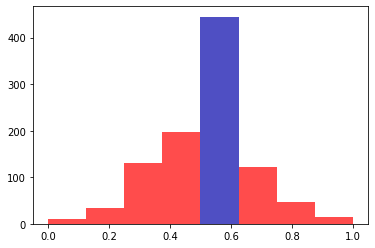

In [8]:
import matplotlib.pyplot as plt 
print(V1)
mu=0.5
eps=0.1
nVal, bins, patches = plt.hist(x=V1, bins=8, color='#0504aa',alpha=0.7,density=False)

nVal = nVal/np.sum(nVal)
indexBin = bins[:-1]

# Compute the probability of observing anomalus samples, i.e., samples with
# means that deviates more than (mu+eps) or less than (mu-eps)
px_be_epsplus = np.sum(nVal[indexBin>=(mu+eps)])
px_be_epsminus = np.sum(nVal[indexBin<=(mu-eps)])

for i in range(len(indexBin)):
  if indexBin[i]>=(mu+eps):
    patches[i].set_facecolor('r')
  if indexBin[i]<=(mu-eps):
    patches[i].set_facecolor('r')

print('mu-eps',(mu-eps))
print('mu+eps',(mu+eps))
print('Prob having highly deviated mean samples ',px_be_epsminus+px_be_epsplus)
print(f"La media de V1 es { np.mean(V1)} y su varianza es {np.var(V1)}")

[0.2, 0.4, 0.6, 0.4, 0.5, 0.3, 0.5, 0.5, 0.4, 0.5, 0.8, 0.3, 0.2, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4, 0.5, 0.4, 0.8, 0.5, 0.5, 0.2, 0.8, 0.5, 0.6, 0.4, 0.7, 0.3, 0.6, 0.5, 0.5, 0.5, 0.5, 0.4, 0.4, 0.3, 0.6, 0.2, 0.7, 0.5, 0.7, 0.5, 0.6, 0.6, 0.4, 0.3, 0.5, 0.6, 0.5, 0.7, 0.5, 0.6, 0.6, 0.6, 0.5, 0.6, 0.9, 0.3, 0.5, 0.5, 0.4, 0.5, 0.8, 0.5, 0.8, 0.3, 0.2, 0.5, 0.6, 0.5, 0.2, 0.4, 0.5, 0.4, 0.6, 0.4, 0.8, 0.7, 0.5, 0.5, 0.4, 0.7, 0.2, 0.3, 0.4, 0.4, 0.3, 0.4, 0.4, 0.4, 0.5, 0.7, 0.3, 0.5, 0.4, 0.3, 0.5, 0.6, 0.6, 0.6, 0.2, 0.5, 0.5, 0.6, 0.7, 0.4, 0.6, 0.5, 0.6, 0.5, 0.6, 0.4, 0.7, 0.6, 0.6, 0.5, 0.4, 0.8, 0.3, 0.6, 0.5, 0.4, 0.6, 0.4, 0.7, 0.8, 0.5, 0.6, 0.5, 0.8, 0.3, 0.2, 0.4, 0.6, 0.6, 0.2, 0.5, 0.7, 0.7, 0.5, 0.4, 0.6, 0.4, 0.3, 0.3, 0.6, 0.5, 0.4, 0.4, 0.4, 0.5, 0.4, 0.8, 0.5, 0.4, 0.6, 0.4, 0.7, 0.7, 0.6, 0.4, 0.2, 0.4, 0.5, 0.4, 0.7, 0.4, 0.6, 0.6, 0.3, 0.6, 0.3, 0.7, 0.6, 0.4, 0.6, 0.4, 0.5, 0.7, 0.5, 0.7, 0.4, 0.4, 0.1, 0.5, 0.3, 0.5, 0.4, 0.8, 0.1, 0.6, 0.2, 0.2, 0.5, 0.7, 0.8, 0.6,

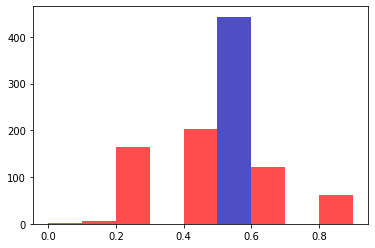

In [9]:
print(Vrand)
nVal1, bins1, patches1 = plt.hist(x=Vrand, bins=9, color='#0504aa',alpha=0.7,density=False)
nVal1 = nVal1/np.sum(nVal1)
indexBin1 = bins1[:-1]

# Compute the probability of observing anomalus samples, i.e., samples with
# means that deviates more than (mu+eps) or less than (mu-eps)
px_be_epsplus = np.sum(nVal1[indexBin1>=(mu+eps)])
px_be_epsminus = np.sum(nVal1[indexBin1<=(mu-eps)])

for i in range(len(indexBin1)):
  if indexBin1[i]>=(mu+eps):
    patches1[i].set_facecolor('r')
  if indexBin1[i]<=(mu-eps):
    patches1[i].set_facecolor('r')

print('mu-eps',(mu-eps))
print('mu+eps',(mu+eps))
print('Prob having highly deviated mean samples ',px_be_epsminus+px_be_epsplus)
print(f"La media de Vrand es { np.mean(Vrand)} y su varianza es {np.var(Vrand)}")

[0.1, 0.1, 0.0, 0.1, 0.1, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.1, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.0, 0.1, 0.1, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.1, 0.0, 0.1, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.1, 0.1, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.0, 0.0, 0.1, 0.0, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

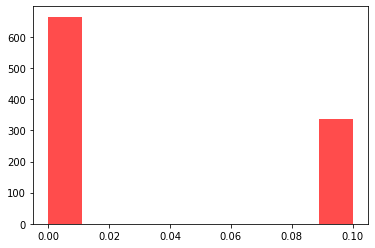

In [10]:
print(Vmin)
nVal1, bins1, patches1 = plt.hist(x=Vmin, bins=9, color='#0504aa',alpha=0.7,density=False)
nVal1 = nVal1/np.sum(nVal1)
indexBin1 = bins1[:-1]

# Compute the probability of observing anomalus samples, i.e., samples with
# means that deviates more than (mu+eps) or less than (mu-eps)
px_be_epsplus = np.sum(nVal1[indexBin1>=(mu+eps)])
px_be_epsminus = np.sum(nVal1[indexBin1<=(mu-eps)])

for i in range(len(indexBin1)):
  if indexBin1[i]>=(mu+eps):
    patches1[i].set_facecolor('r')
  if indexBin1[i]<=(mu-eps):
    patches1[i].set_facecolor('r')

print('mu-eps',(mu-eps))
print('mu+eps',(mu+eps))
print('Prob having highly deviated mean samples ',px_be_epsminus+px_be_epsplus)
print(f"La media de Vmin es { np.mean(Vmin)} y su varianza es {np.var(Vmin)}")

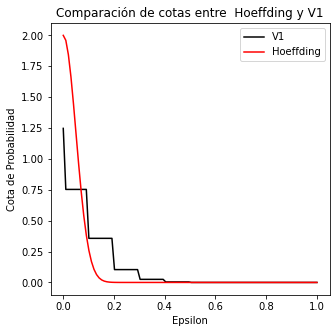

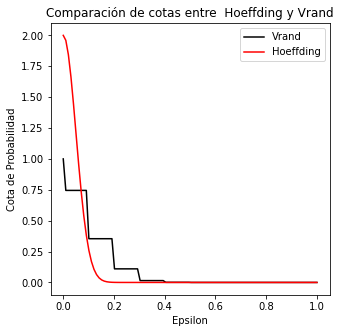

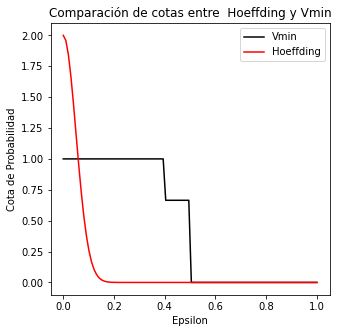

In [12]:

n=100

def Grafi_cota_errores(V, name):
  e=np.linspace(0,1,100)
  nVal= np.histogram(V,500)[0]
  bins= np.histogram(V,500)[1]


  nVal = nVal/np.sum(nVal)
  indexBin = bins[:-1]

  # Compute the probability of observing anomalus samples, i.e., samples with
  # means that deviates more than (mu+eps) or less than (mu-eps)
  px_be_epsplus=np.array([])
  px_be_epsminus=np.array([])
##Cota De Hoeffding
  CoefHoeff=2*np.exp(-2*(e**2)*n)

  for i in range(len(e)):
    a=np.sum(nVal[indexBin>=(mu+e[i])])
    px_be_epsplus=np.append(px_be_epsplus,a)
    b=np.sum(nVal[indexBin<=(mu-e[i])])
    px_be_epsminus=np.append(px_be_epsminus,b)

  plt.figure(figsize=(5,5))
  plt.plot(e,px_be_epsplus+px_be_epsminus,"k",label=name)
  plt.plot(e,CoefHoeff,"r", label="Hoeffding")
  plt.title(f"Comparación de cotas entre  Hoeffding y {name}")
  plt.xlabel("Epsilon")
  plt.ylabel("Cota de Probabilidad")
  plt.legend()
  plt.show()

Grafi_cota_errores(V1,"V1")

Grafi_cota_errores(Vrand,"Vrand")

Grafi_cota_errores(Vmin,"Vmin")

#Grafi_cota_errores(Mus,"Media.")



Se puede concluir que que para $\varepsilon$ pequeños en la variable $C_1$ y la variable $C_{ran}$, la cota se ajusta a la cota de Hoeffding hasta cierta parte, después no, en cambio para $C_{min}$ en ningún lado se ajusta dado que la curva siempre está por encima de la cota de Hoeffding.

c) Cuando se selecciona deliberadamente una muestra específica, los estimadores cambian y la cota de Hoeffding no aplica para esta situación, la relación es que en la figura las hipótesis se selccionan al azar que no es la situación de este ejercicio.

## Exercise 1.11



*   S no puede producir una hipótesis que garantize  una mejor clasificación a un punto escogido al azar ya que si $S=h_1$ con una probabilidad de $p=0.1$ pueden escogerse puntos etiquetados con $-1$ y viceversa, asi que de manera deterministica no es posible garantizar la efectividad de la selección que realice el algoritmo S.  
* Es posible que el clasificador $C$ de mejores clasificaciones que $S$ ya que al estar $S$ ajustado a  $D$ se tiene que $S=h_1$; esto obliga a que en los casos donde la probabilidad $p<0.5$ el sobre ajuste producido logre una cantidad mayor de errores.
*   Si definimos como $S(y):=S_y$ y $C(y):=C_y$ a las hipótesis de salida de los algoritmos respectivos,  tendriamos que:
$$P[f(x)\cdot S_y(x)=1]=P[f(x)=1]\cdot P(S_y=h_1)+P[f(x)=-1]\cdot P(S_y=h_2)=0.9\cdot 1+ 0.1\cdot 0= 0,9$$
Además:
$P[f(x)\cdot C_y(x)=1]=P[f(x)=1]\cdot P(C_y=h_1)+P[f(x)=-1]\cdot P(C_y=h_2)=0.9\cdot 0.5 + 0.1\cdot 0.5=0.5$
 Es decir $P[P(S_y(x)=f(x))>P(C_y(x)=f(x))]=1$

* Si se toma  a $p < 0.5$ pues:

  $$P(S_y(x)=f(x))=P(f(x)=1)P(S_y=h_1)+P(f(x)=-1)P (S_y=h_2)$$

  $$P(S_y(x)=f(x))=p\cdot 1+(1-p)\cdot 0=p$$

y

  $$P[S_y(x)=f(x)]=P(f(x)=1)P(C_y=h_1)+P(f(x)=-1)P(C_y=h_2)$$

  $$P[S_y(x)=f(x)]=p\cdot 0.5+(1-p)\cdot 0.5=0.5$$

   Con lo cual se tiene que si $p<0.5$ entonces $P[ (C_y=f)>P(S_y=f)]=1$. Reafirmando lo comentado en la parte B del ejercicio.
